In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Ainsi/archive/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.shape

(28242, 7)

In [6]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
df.duplicated().sum()

np.int64(2310)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [12]:
df['average_rain_fall_mm_per_year']

,average_rain_fall_mm_per_year
0,1485.0
1,1485.0
2,1485.0
3,1485.0
4,1485.0
...,...
28237,657.0
28238,657.0
28239,657.0
28240,657.0


In [14]:
def isStr(obj):
  try:
    float(obj)
    return False
  except:
    return True

In [18]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [20]:
df=df.drop(to_drop)

In [21]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [28]:
df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].astype(np.float64)

<Axes: xlabel='count', ylabel='Area'>

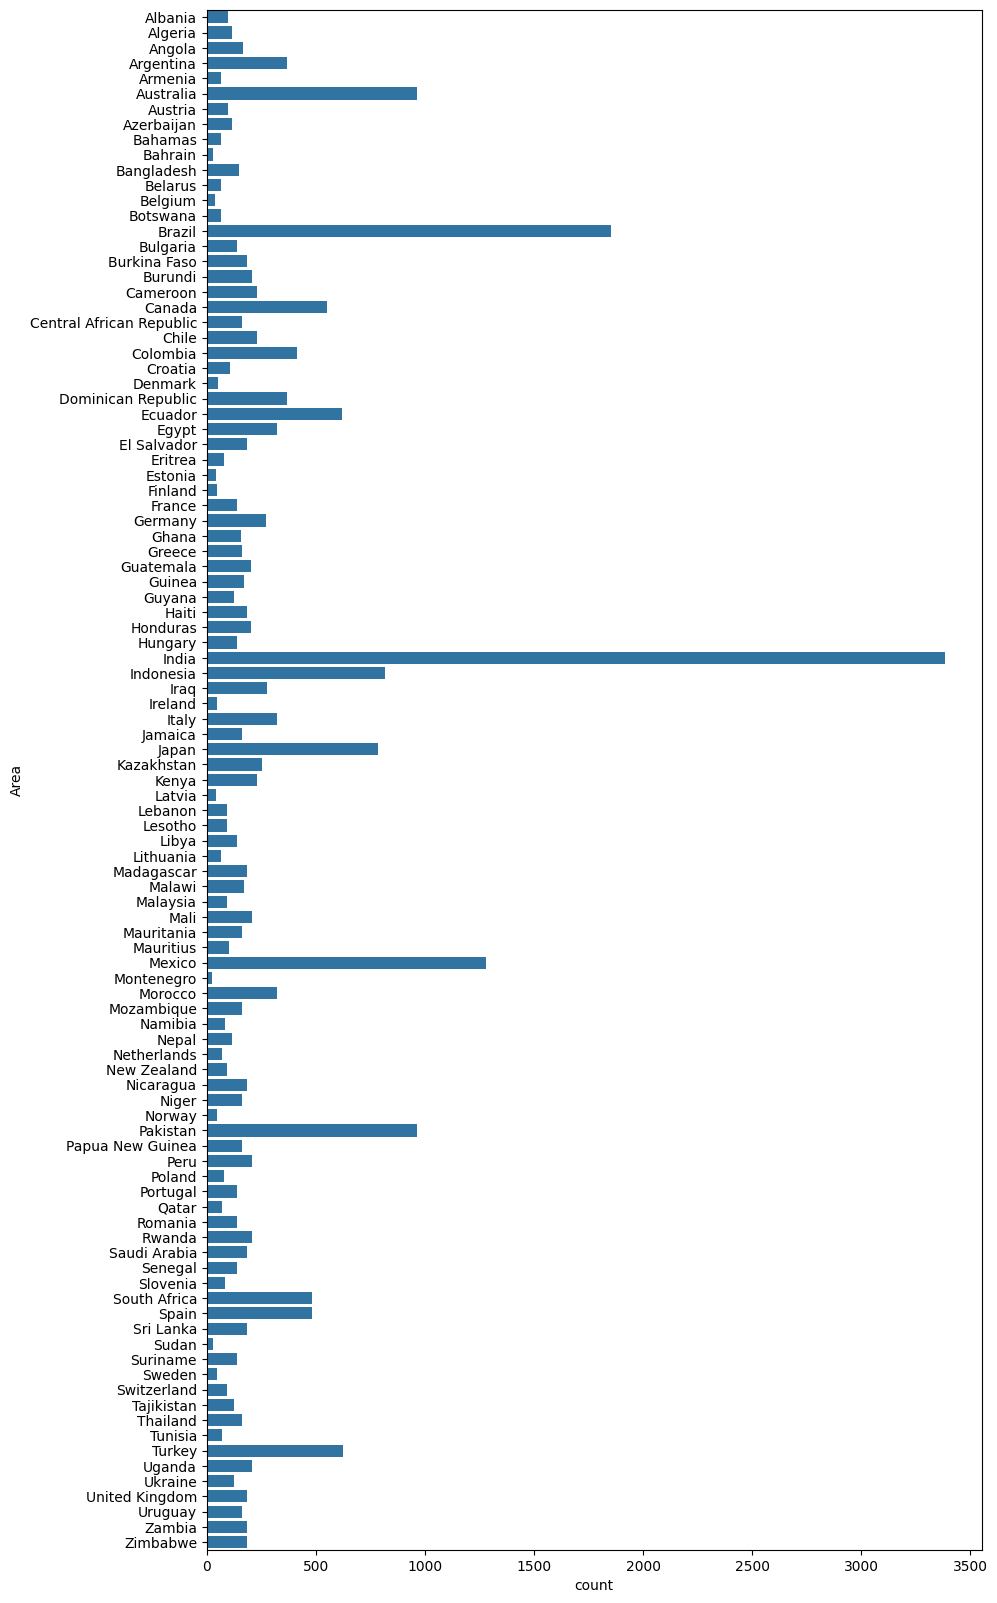

In [24]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

In [33]:
country=(df['Area'].unique())

In [36]:
yield_per_country=[]
for state in country:
  yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].mean())


In [38]:
yield_per_country

[np.float64(57692.28282828283),
 np.float64(58872.491228070176),
 np.float64(34893.67682926829),
 np.float64(89304.43478260869),
 np.float64(71811.11111111111),
 np.float64(112951.4099378882),
 np.float64(113044.35416666667),
 np.float64(39727.41379310345),
 np.float64(65443.53731343283),
 np.float64(153237.55172413794),
 np.float64(52518.08843537415),
 np.float64(74679.55555555556),
 np.float64(216468.46153846153),
 np.float64(7353.921875),
 np.float64(73538.4730312837),
 np.float64(45384.60144927536),
 np.float64(33061.614130434784),
 np.float64(33966.88888888889),
 np.float64(46599.49130434782),
 np.float64(62874.858695652176),
 np.float64(26432.465838509317),
 np.float64(89396.58260869565),
 np.float64(65041.3961352657),
 np.float64(57934.92380952381),
 np.float64(214033.02),
 np.float64(68783.05978260869),
 np.float64(34324.6231884058),
 np.float64(114375.30434782608),
 np.float64(91608.39130434782),
 np.float64(18155.2),
 np.float64(85610.42857142857),
 np.float64(135014.52173913

<Axes: >

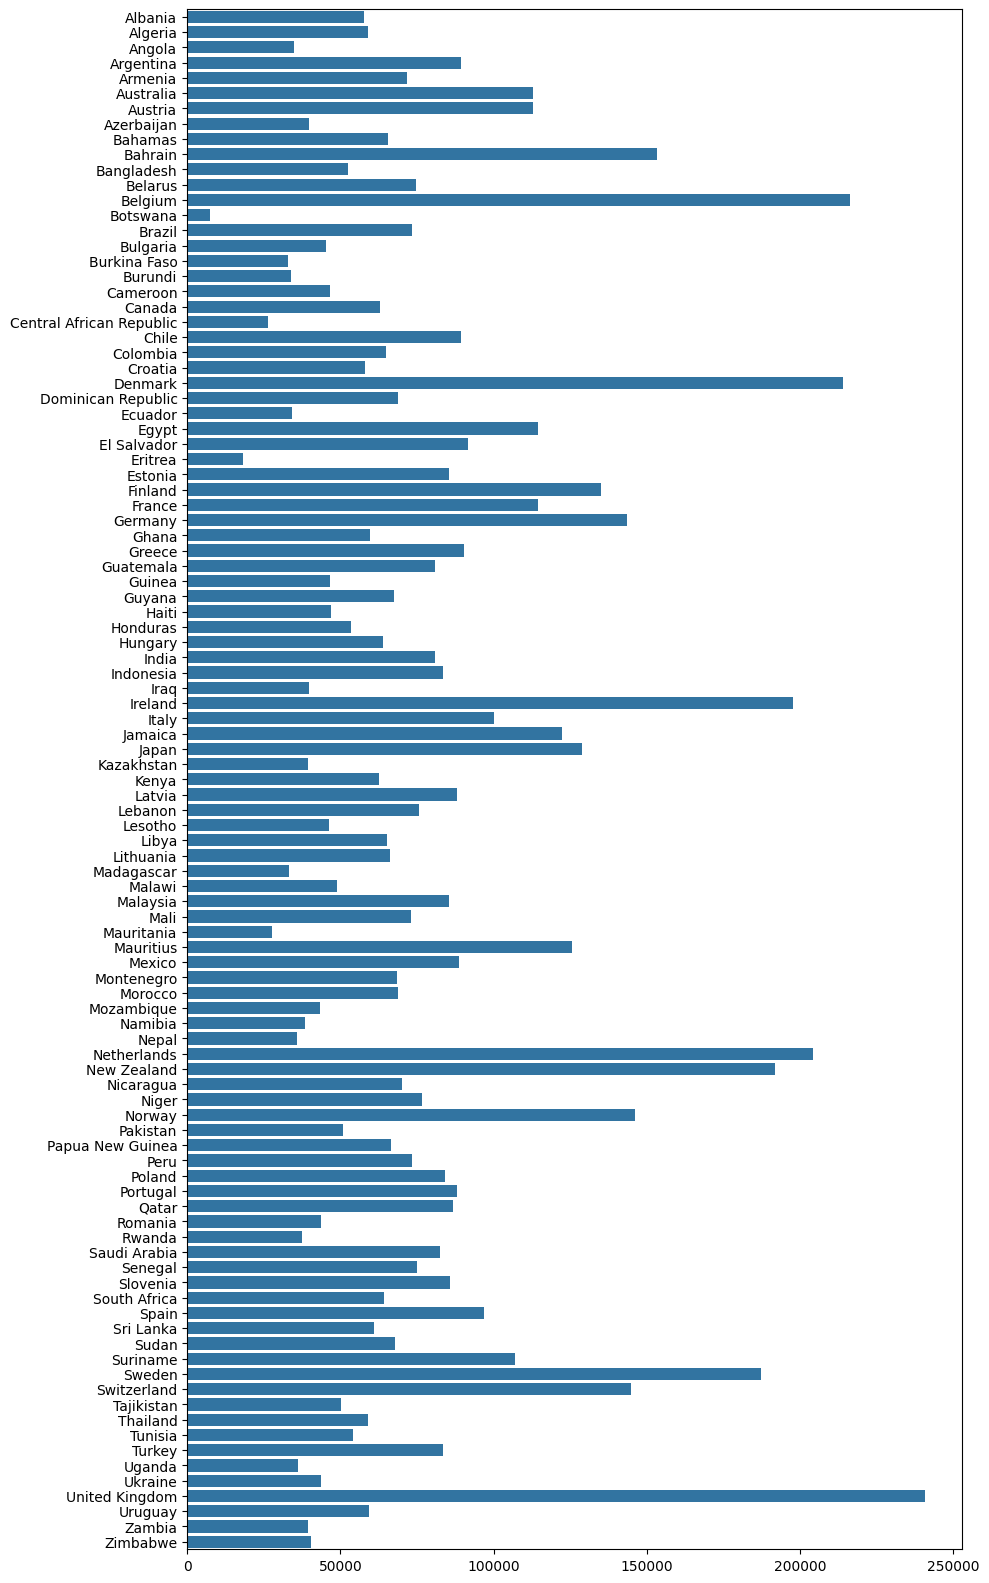

In [39]:
plt.figure(figsize=(10,20))
sns.barplot(y=country,x=yield_per_country)

In [40]:
df['Item'].value_counts()

,count
Item,
Potatoes,3956
Maize,3824
Wheat,3539
"Rice, paddy",3091
Soybeans,2940
Sorghum,2770
Sweet potatoes,2593
Cassava,1889
Yams,774


<Axes: xlabel='count', ylabel='Item'>

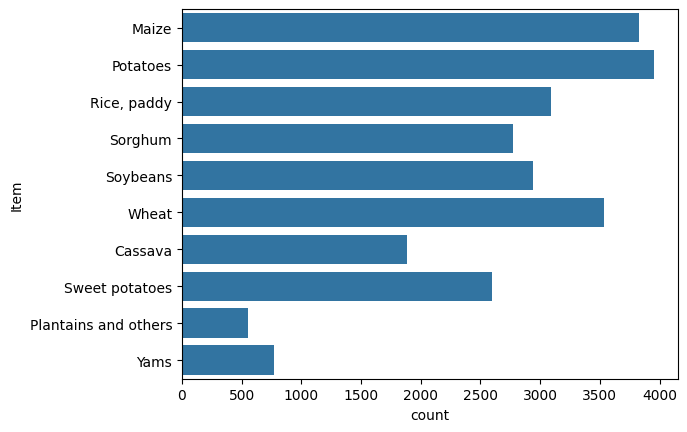

In [41]:
sns.countplot(y=df['Item'])

In [42]:
crops=(df['Item'].unique())

In [45]:
yield_per_crop=[]
for crop in crops:
  yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [46]:
yield_per_crop

[np.int64(142020761),
 np.int64(785921609),
 np.int64(127646024),
 np.int64(52906376),
 np.int64(49957039),
 np.int64(106614786),
 np.int64(275132269),
 np.int64(310269345),
 np.int64(58958974),
 np.int64(86769760)]

<Axes: >

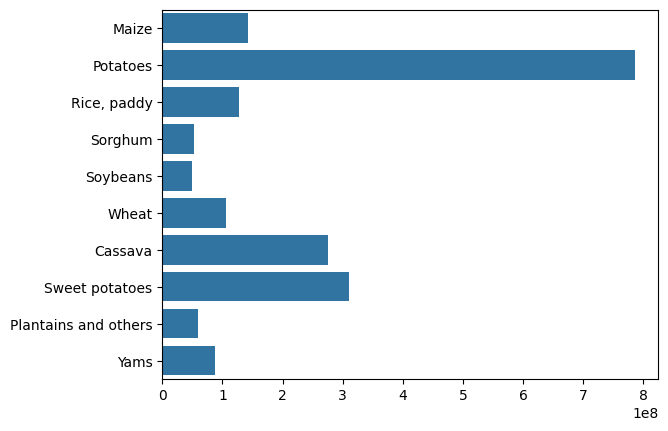

In [47]:
sns.barplot(y=crops,x=yield_per_crop)

In [48]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [50]:
col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]

In [51]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [52]:
x=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0, shuffle=True)

In [55]:
x_train.shape

(20745, 6)

In [56]:
x_test.shape

(5187, 6)

In [57]:
x_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
4907,2005,608.0,2232.25,8.58,Bulgaria,Soybeans
10399,1995,589.0,7715.00,10.34,Hungary,Wheat
23617,1993,854.0,8985.00,15.33,Portugal,"Rice, paddy"
16174,2012,2051.0,909.71,27.51,Jamaica,Sweet potatoes
9077,2007,700.0,40740.64,10.88,Germany,Maize
...,...,...,...,...,...,...
14326,2012,1083.0,52980.00,25.09,India,Soybeans
21268,2002,1732.0,4170.00,13.28,New Zealand,Maize
10415,1998,589.0,5280.00,10.35,Hungary,Sorghum
11542,1995,1083.0,61257.00,25.92,India,Wheat


In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [60]:
x_train_dummy = preprocesser.fit_transform(x_train)
x_test_dummy = preprocesser.transform(x_test)

In [62]:
x_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122865 stored elements and shape (20745, 113)>

In [61]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

In [65]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(x_train_dummy,y_train)
    y_pred = md.predict(x_test_dummy)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29907.497694405192 score : 0.7473129336888378


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29893.99762450549 score : 0.7473261756207235
Rid : mae : 29864.849263727097 score : 0.7473042729963115
Dtr : mae : 3889.654520917679 score : 0.9802563548901809


In [67]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_dummy,y_train)
dtr.predict(x_test_dummy)

array([35286., 22814., 19295., ..., 23359., 34879., 77391.])

In [68]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [70]:
result

array([36613.])

In [71]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [72]:

import sklearn
print(sklearn.__version__)

1.6.1
